In [1]:
import numpy as np
import tensorflow as tf
corpus_raw = 'He is the king . The king is royal . She is the royal  queen '
# convert to lower case
corpus_raw = corpus_raw.lower()
corpus_raw

'he is the king . the king is royal . she is the royal  queen '

In [2]:
words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)
words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

print words
print word2int
print int2word


set(['king', 'is', 'queen', 'royal', 'she', 'the', 'he'])
{'king': 0, 'is': 1, 'queen': 2, 'royal': 3, 'she': 4, 'the': 5, 'he': 6}
{0: 'king', 1: 'is', 2: 'queen', 3: 'royal', 4: 'she', 5: 'the', 6: 'he'}


In [3]:
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())
sentences

[['he', 'is', 'the', 'king'],
 ['the', 'king', 'is', 'royal'],
 ['she', 'is', 'the', 'royal', 'queen']]

In [4]:
data = []
WINDOW_SIZE = 2
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])
data

[['he', 'is'],
 ['he', 'the'],
 ['is', 'he'],
 ['is', 'the'],
 ['is', 'king'],
 ['the', 'he'],
 ['the', 'is'],
 ['the', 'king'],
 ['king', 'is'],
 ['king', 'the'],
 ['the', 'king'],
 ['the', 'is'],
 ['king', 'the'],
 ['king', 'is'],
 ['king', 'royal'],
 ['is', 'the'],
 ['is', 'king'],
 ['is', 'royal'],
 ['royal', 'king'],
 ['royal', 'is'],
 ['she', 'is'],
 ['she', 'the'],
 ['is', 'she'],
 ['is', 'the'],
 ['is', 'royal'],
 ['the', 'she'],
 ['the', 'is'],
 ['the', 'royal'],
 ['the', 'queen'],
 ['royal', 'is'],
 ['royal', 'the'],
 ['royal', 'queen'],
 ['queen', 'the'],
 ['queen', 'royal']]

In [5]:
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

In [6]:
x_train = [] # input word
y_train = [] # output word
vocab_size

7

In [7]:
for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))

In [8]:
print x_train

[array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.]), array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.]), array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.]), array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.]), array([ 0.,  1.,  0.,  0.,  0.,

In [9]:
print y_train

[array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.]), array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.]), array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.]), array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.]), array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.]), array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.]), array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.]), array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.]), array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.]), array([ 0.,  0.,  0.,  0.,  1.,

In [10]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [11]:
print x_train

[[ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0

In [12]:
print y_train

[[ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0

In [13]:
print(x_train.shape, y_train.shape)

((34, 7), (34, 7))


In [14]:
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

In [15]:
EMBEDDING_DIM = 5
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM]))
hidden_representation = tf.add(tf.matmul(x,W1), b1)

In [16]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

In [17]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!
# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))
# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)
n_iters = 10000
# train for n_iter iterations
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

('loss is : ', 4.7884436)
('loss is : ', 4.447063)
('loss is : ', 4.1843448)
('loss is : ', 3.9675086)
('loss is : ', 3.7807872)
('loss is : ', 3.6158788)
('loss is : ', 3.4681034)
('loss is : ', 3.3345656)
('loss is : ', 3.2132652)
('loss is : ', 3.1026809)
('loss is : ', 3.0015771)
('loss is : ', 2.9089096)
('loss is : ', 2.8237782)
('loss is : ', 2.7453978)
('loss is : ', 2.6730831)
('loss is : ', 2.6062319)
('loss is : ', 2.5443161)
('loss is : ', 2.4868698)
('loss is : ', 2.4334831)
('loss is : ', 2.3837912)
('loss is : ', 2.3374698)
('loss is : ', 2.2942281)
('loss is : ', 2.2538037)
('loss is : ', 2.2159607)
('loss is : ', 2.180485)
('loss is : ', 2.1471817)
('loss is : ', 2.1158769)
('loss is : ', 2.0864129)
('loss is : ', 2.0586503)
('loss is : ', 2.032464)
('loss is : ', 2.0077457)
('loss is : ', 1.9844002)
('loss is : ', 1.9623442)
('loss is : ', 1.9415059)
('loss is : ', 1.9218225)
('loss is : ', 1.9032391)
('loss is : ', 1.8857061)
('loss is : ', 1.8691778)
('loss is : ', 

('loss is : ', 1.3985903)
('loss is : ', 1.3983938)
('loss is : ', 1.3981981)
('loss is : ', 1.3980036)
('loss is : ', 1.3978103)
('loss is : ', 1.3976179)
('loss is : ', 1.3974267)
('loss is : ', 1.3972365)
('loss is : ', 1.3970474)
('loss is : ', 1.3968592)
('loss is : ', 1.3966721)
('loss is : ', 1.396486)
('loss is : ', 1.396301)
('loss is : ', 1.3961172)
('loss is : ', 1.3959341)
('loss is : ', 1.3957521)
('loss is : ', 1.3955711)
('loss is : ', 1.3953911)
('loss is : ', 1.3952122)
('loss is : ', 1.3950342)
('loss is : ', 1.3948572)
('loss is : ', 1.394681)
('loss is : ', 1.3945059)
('loss is : ', 1.3943317)
('loss is : ', 1.3941584)
('loss is : ', 1.3939862)
('loss is : ', 1.3938148)
('loss is : ', 1.3936445)
('loss is : ', 1.3934747)
('loss is : ', 1.393306)
('loss is : ', 1.3931384)
('loss is : ', 1.3929716)
('loss is : ', 1.3928057)
('loss is : ', 1.3926406)
('loss is : ', 1.3924764)
('loss is : ', 1.3923131)
('loss is : ', 1.3921506)
('loss is : ', 1.3919892)
('loss is : ', 1

('loss is : ', 1.358882)
('loss is : ', 1.358817)
('loss is : ', 1.3587519)
('loss is : ', 1.3586868)
('loss is : ', 1.358622)
('loss is : ', 1.3585571)
('loss is : ', 1.3584921)
('loss is : ', 1.3584273)
('loss is : ', 1.3583627)
('loss is : ', 1.3582979)
('loss is : ', 1.3582335)
('loss is : ', 1.3581688)
('loss is : ', 1.3581043)
('loss is : ', 1.3580397)
('loss is : ', 1.3579755)
('loss is : ', 1.3579111)
('loss is : ', 1.3578467)
('loss is : ', 1.3577826)
('loss is : ', 1.3577185)
('loss is : ', 1.3576542)
('loss is : ', 1.3575903)
('loss is : ', 1.3575262)
('loss is : ', 1.3574623)
('loss is : ', 1.3573983)
('loss is : ', 1.3573345)
('loss is : ', 1.3572706)
('loss is : ', 1.3572071)
('loss is : ', 1.3571433)
('loss is : ', 1.3570796)
('loss is : ', 1.3570161)
('loss is : ', 1.3569525)
('loss is : ', 1.3568889)
('loss is : ', 1.3568257)
('loss is : ', 1.3567623)
('loss is : ', 1.3566989)
('loss is : ', 1.3566357)
('loss is : ', 1.3565724)
('loss is : ', 1.3565092)
('loss is : ', 

('loss is : ', 1.3379416)
('loss is : ', 1.3379059)
('loss is : ', 1.3378702)
('loss is : ', 1.3378347)
('loss is : ', 1.3377993)
('loss is : ', 1.3377639)
('loss is : ', 1.3377286)
('loss is : ', 1.3376933)
('loss is : ', 1.3376583)
('loss is : ', 1.3376231)
('loss is : ', 1.3375883)
('loss is : ', 1.3375534)
('loss is : ', 1.3375187)
('loss is : ', 1.337484)
('loss is : ', 1.3374492)
('loss is : ', 1.3374147)
('loss is : ', 1.3373804)
('loss is : ', 1.3373461)
('loss is : ', 1.3373117)
('loss is : ', 1.3372775)
('loss is : ', 1.3372434)
('loss is : ', 1.3372092)
('loss is : ', 1.3371755)
('loss is : ', 1.3371416)
('loss is : ', 1.3371078)
('loss is : ', 1.3370742)
('loss is : ', 1.3370405)
('loss is : ', 1.337007)
('loss is : ', 1.3369737)
('loss is : ', 1.3369404)
('loss is : ', 1.336907)
('loss is : ', 1.3368738)
('loss is : ', 1.3368406)
('loss is : ', 1.3368077)
('loss is : ', 1.3367747)
('loss is : ', 1.3367419)
('loss is : ', 1.3367091)
('loss is : ', 1.3366765)
('loss is : ', 

('loss is : ', 1.3287793)
('loss is : ', 1.3287674)
('loss is : ', 1.3287555)
('loss is : ', 1.3287438)
('loss is : ', 1.3287321)
('loss is : ', 1.3287203)
('loss is : ', 1.3287085)
('loss is : ', 1.3286967)
('loss is : ', 1.328685)
('loss is : ', 1.3286735)
('loss is : ', 1.3286618)
('loss is : ', 1.3286504)
('loss is : ', 1.3286387)
('loss is : ', 1.3286273)
('loss is : ', 1.3286157)
('loss is : ', 1.3286042)
('loss is : ', 1.3285928)
('loss is : ', 1.3285815)
('loss is : ', 1.32857)
('loss is : ', 1.3285586)
('loss is : ', 1.3285472)
('loss is : ', 1.328536)
('loss is : ', 1.3285246)
('loss is : ', 1.3285133)
('loss is : ', 1.3285022)
('loss is : ', 1.328491)
('loss is : ', 1.3284798)
('loss is : ', 1.3284686)
('loss is : ', 1.3284575)
('loss is : ', 1.3284465)
('loss is : ', 1.3284353)
('loss is : ', 1.3284243)
('loss is : ', 1.3284132)
('loss is : ', 1.3284024)
('loss is : ', 1.3283913)
('loss is : ', 1.3283805)
('loss is : ', 1.3283696)
('loss is : ', 1.3283587)
('loss is : ', 1.

('loss is : ', 1.3257191)
('loss is : ', 1.3257136)
('loss is : ', 1.3257084)
('loss is : ', 1.3257031)
('loss is : ', 1.3256979)
('loss is : ', 1.3256924)
('loss is : ', 1.3256873)
('loss is : ', 1.3256822)
('loss is : ', 1.3256767)
('loss is : ', 1.3256714)
('loss is : ', 1.3256662)
('loss is : ', 1.3256609)
('loss is : ', 1.3256559)
('loss is : ', 1.3256505)
('loss is : ', 1.3256454)
('loss is : ', 1.3256403)
('loss is : ', 1.325635)
('loss is : ', 1.3256298)
('loss is : ', 1.3256248)
('loss is : ', 1.3256197)
('loss is : ', 1.3256145)
('loss is : ', 1.3256092)
('loss is : ', 1.3256042)
('loss is : ', 1.325599)
('loss is : ', 1.3255941)
('loss is : ', 1.3255889)
('loss is : ', 1.3255838)
('loss is : ', 1.3255786)
('loss is : ', 1.3255737)
('loss is : ', 1.3255684)
('loss is : ', 1.3255634)
('loss is : ', 1.3255584)
('loss is : ', 1.3255534)
('loss is : ', 1.3255484)
('loss is : ', 1.3255434)
('loss is : ', 1.3255384)
('loss is : ', 1.3255333)
('loss is : ', 1.3255283)
('loss is : ',

('loss is : ', 1.3240963)
('loss is : ', 1.3240936)
('loss is : ', 1.3240908)
('loss is : ', 1.3240881)
('loss is : ', 1.3240855)
('loss is : ', 1.3240827)
('loss is : ', 1.3240799)
('loss is : ', 1.3240771)
('loss is : ', 1.3240746)
('loss is : ', 1.3240716)
('loss is : ', 1.324069)
('loss is : ', 1.3240663)
('loss is : ', 1.3240637)
('loss is : ', 1.324061)
('loss is : ', 1.3240583)
('loss is : ', 1.3240554)
('loss is : ', 1.3240528)
('loss is : ', 1.3240502)
('loss is : ', 1.3240474)
('loss is : ', 1.3240447)
('loss is : ', 1.3240421)
('loss is : ', 1.3240393)
('loss is : ', 1.3240367)
('loss is : ', 1.3240342)
('loss is : ', 1.3240315)
('loss is : ', 1.3240288)
('loss is : ', 1.3240262)
('loss is : ', 1.3240234)
('loss is : ', 1.3240209)
('loss is : ', 1.3240181)
('loss is : ', 1.3240156)
('loss is : ', 1.324013)
('loss is : ', 1.3240101)
('loss is : ', 1.3240076)
('loss is : ', 1.3240049)
('loss is : ', 1.3240023)
('loss is : ', 1.3239998)
('loss is : ', 1.3239971)
('loss is : ', 

('loss is : ', 1.3231837)
('loss is : ', 1.3231821)
('loss is : ', 1.3231803)
('loss is : ', 1.3231786)
('loss is : ', 1.323177)
('loss is : ', 1.3231754)
('loss is : ', 1.3231739)
('loss is : ', 1.3231722)
('loss is : ', 1.3231707)
('loss is : ', 1.3231689)
('loss is : ', 1.3231673)
('loss is : ', 1.3231657)
('loss is : ', 1.323164)
('loss is : ', 1.3231626)
('loss is : ', 1.3231609)
('loss is : ', 1.3231592)
('loss is : ', 1.3231577)
('loss is : ', 1.323156)
('loss is : ', 1.3231544)
('loss is : ', 1.3231529)
('loss is : ', 1.3231514)
('loss is : ', 1.3231497)
('loss is : ', 1.323148)
('loss is : ', 1.3231463)
('loss is : ', 1.3231448)
('loss is : ', 1.3231432)
('loss is : ', 1.3231417)
('loss is : ', 1.32314)
('loss is : ', 1.3231384)
('loss is : ', 1.3231368)
('loss is : ', 1.3231353)
('loss is : ', 1.3231338)
('loss is : ', 1.3231323)
('loss is : ', 1.3231306)
('loss is : ', 1.3231288)
('loss is : ', 1.3231274)
('loss is : ', 1.3231258)
('loss is : ', 1.3231242)
('loss is : ', 1.3

('loss is : ', 1.3226585)
('loss is : ', 1.3226575)
('loss is : ', 1.3226563)
('loss is : ', 1.3226551)
('loss is : ', 1.3226539)
('loss is : ', 1.3226529)
('loss is : ', 1.3226519)
('loss is : ', 1.3226506)
('loss is : ', 1.3226496)
('loss is : ', 1.3226484)
('loss is : ', 1.3226476)
('loss is : ', 1.3226464)
('loss is : ', 1.3226452)
('loss is : ', 1.3226441)
('loss is : ', 1.3226429)
('loss is : ', 1.3226418)
('loss is : ', 1.3226408)
('loss is : ', 1.3226397)
('loss is : ', 1.3226386)
('loss is : ', 1.3226376)
('loss is : ', 1.3226366)
('loss is : ', 1.3226353)
('loss is : ', 1.3226341)
('loss is : ', 1.322633)
('loss is : ', 1.322632)
('loss is : ', 1.3226309)
('loss is : ', 1.3226299)
('loss is : ', 1.3226287)
('loss is : ', 1.3226277)
('loss is : ', 1.3226266)
('loss is : ', 1.3226255)
('loss is : ', 1.3226244)
('loss is : ', 1.3226233)
('loss is : ', 1.3226223)
('loss is : ', 1.3226212)
('loss is : ', 1.3226202)
('loss is : ', 1.3226191)
('loss is : ', 1.3226179)
('loss is : ',

('loss is : ', 1.3222852)
('loss is : ', 1.3222843)
('loss is : ', 1.3222835)
('loss is : ', 1.3222828)
('loss is : ', 1.322282)
('loss is : ', 1.3222812)
('loss is : ', 1.3222804)
('loss is : ', 1.3222796)
('loss is : ', 1.3222787)
('loss is : ', 1.322278)
('loss is : ', 1.3222773)
('loss is : ', 1.3222764)
('loss is : ', 1.3222756)
('loss is : ', 1.3222748)
('loss is : ', 1.3222741)
('loss is : ', 1.3222731)
('loss is : ', 1.3222725)
('loss is : ', 1.3222718)
('loss is : ', 1.3222708)
('loss is : ', 1.3222702)
('loss is : ', 1.3222693)
('loss is : ', 1.3222685)
('loss is : ', 1.3222678)
('loss is : ', 1.3222669)
('loss is : ', 1.3222662)
('loss is : ', 1.3222654)
('loss is : ', 1.3222647)
('loss is : ', 1.3222638)
('loss is : ', 1.322263)
('loss is : ', 1.3222624)
('loss is : ', 1.3222615)
('loss is : ', 1.3222607)
('loss is : ', 1.3222599)
('loss is : ', 1.3222591)
('loss is : ', 1.3222584)
('loss is : ', 1.3222576)
('loss is : ', 1.3222568)
('loss is : ', 1.3222562)
('loss is : ', 

('loss is : ', 1.3219938)
('loss is : ', 1.3219935)
('loss is : ', 1.321993)
('loss is : ', 1.3219923)
('loss is : ', 1.3219918)
('loss is : ', 1.3219912)
('loss is : ', 1.3219904)
('loss is : ', 1.3219899)
('loss is : ', 1.3219893)
('loss is : ', 1.3219887)
('loss is : ', 1.3219882)
('loss is : ', 1.3219877)
('loss is : ', 1.3219872)
('loss is : ', 1.3219864)
('loss is : ', 1.3219861)
('loss is : ', 1.3219852)
('loss is : ', 1.3219848)
('loss is : ', 1.3219843)
('loss is : ', 1.3219836)
('loss is : ', 1.321983)
('loss is : ', 1.3219825)
('loss is : ', 1.3219819)
('loss is : ', 1.3219813)
('loss is : ', 1.3219807)
('loss is : ', 1.3219802)
('loss is : ', 1.3219795)
('loss is : ', 1.321979)
('loss is : ', 1.3219784)
('loss is : ', 1.3219779)
('loss is : ', 1.3219773)
('loss is : ', 1.3219768)
('loss is : ', 1.3219762)
('loss is : ', 1.3219755)
('loss is : ', 1.321975)
('loss is : ', 1.3219745)
('loss is : ', 1.3219739)
('loss is : ', 1.3219733)
('loss is : ', 1.3219727)
('loss is : ', 1

('loss is : ', 1.3217887)
('loss is : ', 1.3217881)
('loss is : ', 1.3217878)
('loss is : ', 1.3217872)
('loss is : ', 1.321787)
('loss is : ', 1.3217864)
('loss is : ', 1.3217859)
('loss is : ', 1.3217853)
('loss is : ', 1.3217851)
('loss is : ', 1.3217845)
('loss is : ', 1.3217841)
('loss is : ', 1.3217837)
('loss is : ', 1.3217832)
('loss is : ', 1.3217827)
('loss is : ', 1.3217822)
('loss is : ', 1.3217819)
('loss is : ', 1.3217815)
('loss is : ', 1.321781)
('loss is : ', 1.3217804)
('loss is : ', 1.3217802)
('loss is : ', 1.3217797)
('loss is : ', 1.3217791)
('loss is : ', 1.3217788)
('loss is : ', 1.3217783)
('loss is : ', 1.3217778)
('loss is : ', 1.3217773)
('loss is : ', 1.321777)
('loss is : ', 1.3217764)
('loss is : ', 1.3217762)
('loss is : ', 1.3217756)
('loss is : ', 1.3217751)
('loss is : ', 1.3217748)
('loss is : ', 1.3217742)
('loss is : ', 1.3217738)
('loss is : ', 1.3217735)
('loss is : ', 1.3217729)
('loss is : ', 1.3217725)
('loss is : ', 1.3217722)
('loss is : ', 

('loss is : ', 1.3216054)
('loss is : ', 1.3216051)
('loss is : ', 1.3216047)
('loss is : ', 1.3216046)
('loss is : ', 1.3216041)
('loss is : ', 1.3216038)
('loss is : ', 1.3216034)
('loss is : ', 1.3216031)
('loss is : ', 1.3216027)
('loss is : ', 1.3216025)
('loss is : ', 1.3216021)
('loss is : ', 1.3216016)
('loss is : ', 1.3216013)
('loss is : ', 1.321601)
('loss is : ', 1.3216006)
('loss is : ', 1.3216003)
('loss is : ', 1.3216)
('loss is : ', 1.3215997)
('loss is : ', 1.3215992)
('loss is : ', 1.321599)
('loss is : ', 1.3215985)
('loss is : ', 1.3215982)
('loss is : ', 1.3215978)
('loss is : ', 1.3215976)
('loss is : ', 1.3215971)
('loss is : ', 1.321597)
('loss is : ', 1.3215965)
('loss is : ', 1.3215961)
('loss is : ', 1.3215958)
('loss is : ', 1.3215954)
('loss is : ', 1.3215952)
('loss is : ', 1.321595)
('loss is : ', 1.3215944)
('loss is : ', 1.3215941)
('loss is : ', 1.3215938)
('loss is : ', 1.3215935)
('loss is : ', 1.321593)
('loss is : ', 1.3215928)
('loss is : ', 1.321

('loss is : ', 1.3214722)
('loss is : ', 1.3214718)
('loss is : ', 1.3214716)
('loss is : ', 1.3214712)
('loss is : ', 1.3214711)
('loss is : ', 1.3214707)
('loss is : ', 1.3214705)
('loss is : ', 1.32147)
('loss is : ', 1.3214698)
('loss is : ', 1.3214697)
('loss is : ', 1.3214693)
('loss is : ', 1.3214691)
('loss is : ', 1.3214687)
('loss is : ', 1.3214685)
('loss is : ', 1.3214682)
('loss is : ', 1.321468)
('loss is : ', 1.3214676)
('loss is : ', 1.3214674)
('loss is : ', 1.3214672)
('loss is : ', 1.3214669)
('loss is : ', 1.3214666)
('loss is : ', 1.3214663)
('loss is : ', 1.321466)
('loss is : ', 1.3214657)
('loss is : ', 1.3214655)
('loss is : ', 1.3214653)
('loss is : ', 1.3214649)
('loss is : ', 1.3214645)
('loss is : ', 1.3214644)
('loss is : ', 1.3214642)
('loss is : ', 1.3214638)
('loss is : ', 1.3214636)
('loss is : ', 1.3214632)
('loss is : ', 1.321463)
('loss is : ', 1.3214628)
('loss is : ', 1.3214624)
('loss is : ', 1.3214622)
('loss is : ', 1.3214617)
('loss is : ', 1.

('loss is : ', 1.3213598)
('loss is : ', 1.3213595)
('loss is : ', 1.3213593)
('loss is : ', 1.321359)
('loss is : ', 1.3213587)
('loss is : ', 1.3213587)
('loss is : ', 1.3213586)
('loss is : ', 1.3213582)
('loss is : ', 1.321358)
('loss is : ', 1.3213577)
('loss is : ', 1.3213575)
('loss is : ', 1.3213573)
('loss is : ', 1.3213571)
('loss is : ', 1.3213568)
('loss is : ', 1.3213567)
('loss is : ', 1.3213564)
('loss is : ', 1.3213561)
('loss is : ', 1.3213558)
('loss is : ', 1.3213558)
('loss is : ', 1.3213555)
('loss is : ', 1.3213552)
('loss is : ', 1.3213551)
('loss is : ', 1.3213547)
('loss is : ', 1.3213545)
('loss is : ', 1.3213545)
('loss is : ', 1.3213542)
('loss is : ', 1.3213539)
('loss is : ', 1.3213537)
('loss is : ', 1.3213533)
('loss is : ', 1.3213532)
('loss is : ', 1.321353)
('loss is : ', 1.3213528)
('loss is : ', 1.3213526)
('loss is : ', 1.3213524)
('loss is : ', 1.321352)
('loss is : ', 1.3213519)
('loss is : ', 1.3213516)
('loss is : ', 1.3213513)
('loss is : ', 1

('loss is : ', 1.3212676)
('loss is : ', 1.3212672)
('loss is : ', 1.3212671)
('loss is : ', 1.3212671)
('loss is : ', 1.3212669)
('loss is : ', 1.3212665)
('loss is : ', 1.3212665)
('loss is : ', 1.3212663)
('loss is : ', 1.3212661)
('loss is : ', 1.3212658)
('loss is : ', 1.3212657)
('loss is : ', 1.3212655)
('loss is : ', 1.3212652)
('loss is : ', 1.3212652)
('loss is : ', 1.321265)
('loss is : ', 1.3212647)
('loss is : ', 1.3212646)
('loss is : ', 1.3212644)
('loss is : ', 1.3212643)
('loss is : ', 1.321264)
('loss is : ', 1.3212637)
('loss is : ', 1.3212636)
('loss is : ', 1.3212633)
('loss is : ', 1.3212633)
('loss is : ', 1.3212631)
('loss is : ', 1.321263)
('loss is : ', 1.3212628)
('loss is : ', 1.3212625)
('loss is : ', 1.3212622)
('loss is : ', 1.3212621)
('loss is : ', 1.3212621)
('loss is : ', 1.3212618)
('loss is : ', 1.3212615)
('loss is : ', 1.3212614)
('loss is : ', 1.3212613)
('loss is : ', 1.3212612)
('loss is : ', 1.3212609)
('loss is : ', 1.3212607)
('loss is : ', 

('loss is : ', 1.3212088)
('loss is : ', 1.3212085)
('loss is : ', 1.3212084)
('loss is : ', 1.3212082)
('loss is : ', 1.3212081)
('loss is : ', 1.321208)
('loss is : ', 1.3212078)
('loss is : ', 1.3212076)
('loss is : ', 1.3212075)
('loss is : ', 1.3212074)
('loss is : ', 1.321207)
('loss is : ', 1.321207)
('loss is : ', 1.3212068)
('loss is : ', 1.3212067)
('loss is : ', 1.3212065)
('loss is : ', 1.3212062)
('loss is : ', 1.3212061)
('loss is : ', 1.3212061)
('loss is : ', 1.3212059)
('loss is : ', 1.3212056)
('loss is : ', 1.3212055)
('loss is : ', 1.3212054)
('loss is : ', 1.3212051)
('loss is : ', 1.3212051)
('loss is : ', 1.3212049)
('loss is : ', 1.3212047)
('loss is : ', 1.3212044)
('loss is : ', 1.3212043)
('loss is : ', 1.3212042)
('loss is : ', 1.3212042)
('loss is : ', 1.3212039)
('loss is : ', 1.3212036)
('loss is : ', 1.3212036)
('loss is : ', 1.3212035)
('loss is : ', 1.3212034)
('loss is : ', 1.321203)
('loss is : ', 1.3212029)
('loss is : ', 1.3212028)
('loss is : ', 1

('loss is : ', 1.3211433)
('loss is : ', 1.3211432)
('loss is : ', 1.321143)
('loss is : ', 1.3211429)
('loss is : ', 1.3211428)
('loss is : ', 1.3211426)
('loss is : ', 1.3211426)
('loss is : ', 1.3211423)
('loss is : ', 1.3211422)
('loss is : ', 1.321142)
('loss is : ', 1.3211418)
('loss is : ', 1.3211417)
('loss is : ', 1.3211416)
('loss is : ', 1.3211415)
('loss is : ', 1.3211412)
('loss is : ', 1.3211412)
('loss is : ', 1.321141)
('loss is : ', 1.3211409)
('loss is : ', 1.3211408)
('loss is : ', 1.3211405)
('loss is : ', 1.3211404)
('loss is : ', 1.3211404)
('loss is : ', 1.3211403)
('loss is : ', 1.3211401)
('loss is : ', 1.3211398)
('loss is : ', 1.3211397)
('loss is : ', 1.3211396)
('loss is : ', 1.3211396)
('loss is : ', 1.3211393)
('loss is : ', 1.3211392)
('loss is : ', 1.3211391)
('loss is : ', 1.321139)
('loss is : ', 1.3211389)
('loss is : ', 1.3211389)
('loss is : ', 1.3211384)
('loss is : ', 1.3211384)
('loss is : ', 1.3211383)
('loss is : ', 1.321138)
('loss is : ', 1.

('loss is : ', 1.321101)
('loss is : ', 1.3211008)
('loss is : ', 1.3211007)
('loss is : ', 1.3211006)
('loss is : ', 1.3211005)
('loss is : ', 1.3211002)
('loss is : ', 1.3211001)
('loss is : ', 1.3211)
('loss is : ', 1.3210999)
('loss is : ', 1.3210999)
('loss is : ', 1.3210996)
('loss is : ', 1.3210995)
('loss is : ', 1.3210994)
('loss is : ', 1.3210993)
('loss is : ', 1.3210993)
('loss is : ', 1.321099)
('loss is : ', 1.321099)
('loss is : ', 1.3210988)
('loss is : ', 1.3210987)
('loss is : ', 1.3210984)
('loss is : ', 1.3210984)
('loss is : ', 1.3210983)
('loss is : ', 1.3210981)
('loss is : ', 1.3210981)
('loss is : ', 1.321098)
('loss is : ', 1.3210977)
('loss is : ', 1.3210977)
('loss is : ', 1.3210976)
('loss is : ', 1.3210974)
('loss is : ', 1.3210973)
('loss is : ', 1.3210971)
('loss is : ', 1.3210971)
('loss is : ', 1.3210969)
('loss is : ', 1.3210968)
('loss is : ', 1.3210968)
('loss is : ', 1.3210965)
('loss is : ', 1.3210965)
('loss is : ', 1.3210964)
('loss is : ', 1.32

('loss is : ', 1.3210499)
('loss is : ', 1.3210499)
('loss is : ', 1.3210498)
('loss is : ', 1.3210497)
('loss is : ', 1.3210496)
('loss is : ', 1.3210496)
('loss is : ', 1.3210495)
('loss is : ', 1.3210492)
('loss is : ', 1.321049)
('loss is : ', 1.321049)
('loss is : ', 1.321049)
('loss is : ', 1.3210487)
('loss is : ', 1.3210487)
('loss is : ', 1.3210485)
('loss is : ', 1.3210484)
('loss is : ', 1.3210484)
('loss is : ', 1.3210481)
('loss is : ', 1.3210481)
('loss is : ', 1.321048)
('loss is : ', 1.3210478)
('loss is : ', 1.3210478)
('loss is : ', 1.3210478)
('loss is : ', 1.3210475)
('loss is : ', 1.3210475)
('loss is : ', 1.3210474)
('loss is : ', 1.3210473)
('loss is : ', 1.3210471)
('loss is : ', 1.3210471)
('loss is : ', 1.3210468)
('loss is : ', 1.3210468)
('loss is : ', 1.3210468)
('loss is : ', 1.3210465)
('loss is : ', 1.3210465)
('loss is : ', 1.3210462)
('loss is : ', 1.3210462)
('loss is : ', 1.3210462)
('loss is : ', 1.3210461)
('loss is : ', 1.321046)
('loss is : ', 1.

('loss is : ', 1.321007)
('loss is : ', 1.321007)
('loss is : ', 1.3210069)
('loss is : ', 1.3210068)
('loss is : ', 1.3210067)
('loss is : ', 1.3210064)
('loss is : ', 1.3210064)
('loss is : ', 1.3210064)
('loss is : ', 1.3210063)
('loss is : ', 1.3210062)
('loss is : ', 1.3210061)
('loss is : ', 1.3210059)
('loss is : ', 1.3210058)
('loss is : ', 1.3210058)
('loss is : ', 1.3210057)
('loss is : ', 1.3210057)
('loss is : ', 1.3210055)
('loss is : ', 1.3210055)
('loss is : ', 1.3210052)
('loss is : ', 1.3210052)
('loss is : ', 1.3210051)
('loss is : ', 1.3210051)
('loss is : ', 1.3210049)
('loss is : ', 1.3210049)
('loss is : ', 1.3210046)
('loss is : ', 1.3210045)
('loss is : ', 1.3210044)
('loss is : ', 1.3210043)
('loss is : ', 1.3210044)
('loss is : ', 1.3210043)
('loss is : ', 1.321004)
('loss is : ', 1.321004)
('loss is : ', 1.321004)
('loss is : ', 1.3210039)
('loss is : ', 1.3210038)
('loss is : ', 1.3210038)
('loss is : ', 1.3210036)
('loss is : ', 1.3210036)
('loss is : ', 1.

('loss is : ', 1.3209677)
('loss is : ', 1.3209676)
('loss is : ', 1.3209676)
('loss is : ', 1.3209673)
('loss is : ', 1.3209672)
('loss is : ', 1.3209672)
('loss is : ', 1.3209672)
('loss is : ', 1.3209671)
('loss is : ', 1.3209668)
('loss is : ', 1.3209668)
('loss is : ', 1.3209668)
('loss is : ', 1.3209666)
('loss is : ', 1.3209666)
('loss is : ', 1.3209665)
('loss is : ', 1.3209664)
('loss is : ', 1.3209664)
('loss is : ', 1.3209661)
('loss is : ', 1.3209661)
('loss is : ', 1.320966)
('loss is : ', 1.3209659)
('loss is : ', 1.3209658)
('loss is : ', 1.3209658)
('loss is : ', 1.3209658)
('loss is : ', 1.3209656)
('loss is : ', 1.3209656)
('loss is : ', 1.3209654)
('loss is : ', 1.3209654)
('loss is : ', 1.3209654)
('loss is : ', 1.3209653)
('loss is : ', 1.3209652)
('loss is : ', 1.3209651)
('loss is : ', 1.3209651)
('loss is : ', 1.3209651)
('loss is : ', 1.3209648)
('loss is : ', 1.3209647)
('loss is : ', 1.3209647)
('loss is : ', 1.3209646)
('loss is : ', 1.3209645)
('loss is : '

('loss is : ', 1.3209317)
('loss is : ', 1.3209316)
('loss is : ', 1.3209316)
('loss is : ', 1.3209314)
('loss is : ', 1.3209314)
('loss is : ', 1.3209312)
('loss is : ', 1.3209312)
('loss is : ', 1.3209311)
('loss is : ', 1.320931)
('loss is : ', 1.320931)
('loss is : ', 1.320931)
('loss is : ', 1.3209308)
('loss is : ', 1.3209306)
('loss is : ', 1.3209306)
('loss is : ', 1.3209306)
('loss is : ', 1.3209305)
('loss is : ', 1.3209306)
('loss is : ', 1.3209304)
('loss is : ', 1.3209304)
('loss is : ', 1.3209302)
('loss is : ', 1.3209301)
('loss is : ', 1.32093)
('loss is : ', 1.3209299)
('loss is : ', 1.3209299)
('loss is : ', 1.3209298)
('loss is : ', 1.3209295)
('loss is : ', 1.3209296)
('loss is : ', 1.3209295)
('loss is : ', 1.3209295)
('loss is : ', 1.3209295)
('loss is : ', 1.3209295)
('loss is : ', 1.3209293)
('loss is : ', 1.3209293)
('loss is : ', 1.3209293)
('loss is : ', 1.3209291)
('loss is : ', 1.3209291)
('loss is : ', 1.3209289)
('loss is : ', 1.3209289)
('loss is : ', 1.

('loss is : ', 1.3209085)
('loss is : ', 1.3209085)
('loss is : ', 1.3209084)
('loss is : ', 1.3209083)
('loss is : ', 1.3209083)
('loss is : ', 1.3209081)
('loss is : ', 1.320908)
('loss is : ', 1.320908)
('loss is : ', 1.320908)
('loss is : ', 1.320908)
('loss is : ', 1.3209078)
('loss is : ', 1.3209077)
('loss is : ', 1.3209077)
('loss is : ', 1.3209077)
('loss is : ', 1.3209075)
('loss is : ', 1.3209074)
('loss is : ', 1.3209074)
('loss is : ', 1.3209072)
('loss is : ', 1.3209072)
('loss is : ', 1.3209071)
('loss is : ', 1.3209071)
('loss is : ', 1.320907)
('loss is : ', 1.3209069)
('loss is : ', 1.3209069)
('loss is : ', 1.3209069)
('loss is : ', 1.3209066)
('loss is : ', 1.3209066)
('loss is : ', 1.3209066)
('loss is : ', 1.3209065)
('loss is : ', 1.3209065)
('loss is : ', 1.3209064)
('loss is : ', 1.3209064)
('loss is : ', 1.3209064)
('loss is : ', 1.3209062)
('loss is : ', 1.3209062)
('loss is : ', 1.320906)
('loss is : ', 1.320906)
('loss is : ', 1.3209059)
('loss is : ', 1.32

('loss is : ', 1.3208789)
('loss is : ', 1.3208789)
('loss is : ', 1.3208787)
('loss is : ', 1.3208787)
('loss is : ', 1.3208786)
('loss is : ', 1.3208786)
('loss is : ', 1.3208786)
('loss is : ', 1.3208784)
('loss is : ', 1.3208783)
('loss is : ', 1.3208783)
('loss is : ', 1.3208783)
('loss is : ', 1.3208781)
('loss is : ', 1.3208781)
('loss is : ', 1.3208781)
('loss is : ', 1.320878)
('loss is : ', 1.320878)
('loss is : ', 1.320878)
('loss is : ', 1.320878)
('loss is : ', 1.320878)
('loss is : ', 1.3208778)
('loss is : ', 1.3208776)
('loss is : ', 1.3208776)
('loss is : ', 1.3208776)
('loss is : ', 1.3208774)
('loss is : ', 1.3208773)
('loss is : ', 1.3208773)
('loss is : ', 1.3208773)
('loss is : ', 1.3208773)
('loss is : ', 1.3208772)
('loss is : ', 1.3208772)
('loss is : ', 1.3208771)
('loss is : ', 1.320877)
('loss is : ', 1.320877)
('loss is : ', 1.320877)
('loss is : ', 1.3208768)
('loss is : ', 1.3208767)
('loss is : ', 1.3208767)
('loss is : ', 1.3208767)
('loss is : ', 1.320

In [18]:
print(sess.run(W1))
print('----------')
print(sess.run(b1))
print('----------')

[[ 1.822873   -1.15439296  2.24953437  0.64303112 -0.09176286]
 [-0.42567906  2.52856922 -0.76591069  0.1332843   0.55192941]
 [ 1.2435925   0.84219718  1.2756747   0.43349421  1.10450816]
 [-0.57118958 -1.15505123 -1.15008581  0.93677318 -0.75773543]
 [ 1.11731386 -0.51801383 -0.78390068 -0.21567386 -1.20896482]
 [-2.03402734  0.17794976  0.81333393 -0.68807769 -1.67805064]
 [ 2.53194809  0.55933285  0.14367558  0.53286457 -1.76339972]]
----------
[ 1.00782633 -0.62533206  0.19931939  0.50081062  0.45528525]
----------


In [19]:
vectors = sess.run(W1 + b1)
vectors

array([[ 2.83069944, -1.77972507,  2.44885373,  1.14384174,  0.36352241],
       [ 0.58214724,  1.9032371 , -0.56659126,  0.63409495,  1.00721467],
       [ 2.25141883,  0.21686512,  1.47499406,  0.93430483,  1.55979347],
       [ 0.43663675, -1.78038335, -0.95076644,  1.4375838 , -0.30245018],
       [ 2.12514019, -1.14334583, -0.58458126,  0.28513676, -0.75367957],
       [-1.02620101, -0.4473823 ,  1.01265335, -0.18726707, -1.22276545],
       [ 3.53977442, -0.06599921,  0.34299499,  1.03367519, -1.30811453]], dtype=float32)

In [20]:
vectors[ word2int['queen'] ]

array([ 2.25141883,  0.21686512,  1.47499406,  0.93430483,  1.55979347], dtype=float32)

In [21]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [22]:
print(int2word[find_closest(word2int['king'], vectors)])
print(int2word[find_closest(word2int['queen'], vectors)])
print(int2word[find_closest(word2int['royal'], vectors)])

queen
king
she


In [23]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

In [24]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

king 0.491585 0.87083
is -0.9603 0.27897
queen -0.287291 0.957843
royal -0.595027 -0.803705
she 0.561894 0.827209
the 0.575675 -0.817679
he 0.997158 0.075337


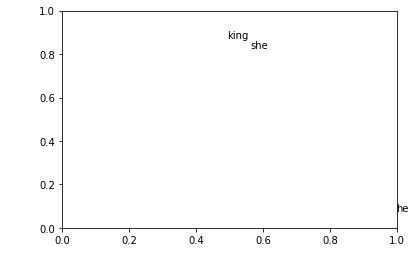

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for word in words:
    print word, vectors[word2int[word]][0], vectors[word2int[word]][1]
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()